<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/SP/Light_dffraction_slit_intensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffraction through slit

Digital simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


Expected intencity

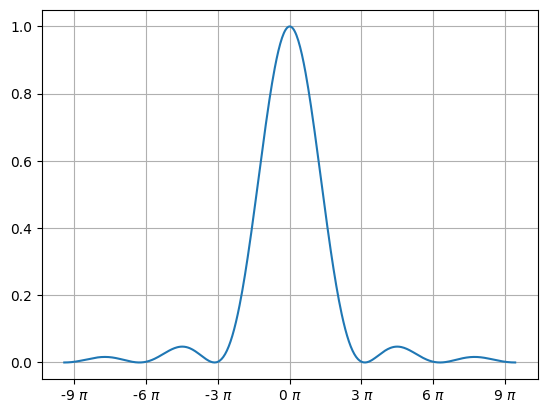

In [6]:
x =  np.linspace(- 3*np.pi, 3*np.pi, 500)
A = (np.sin(x) / x)
I = A * A
plt.plot(x, I)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(MultipleLocator(base=3.0))
plt.grid()


Digital simulation for slit size $d$ and incident angle $\alpha_0$

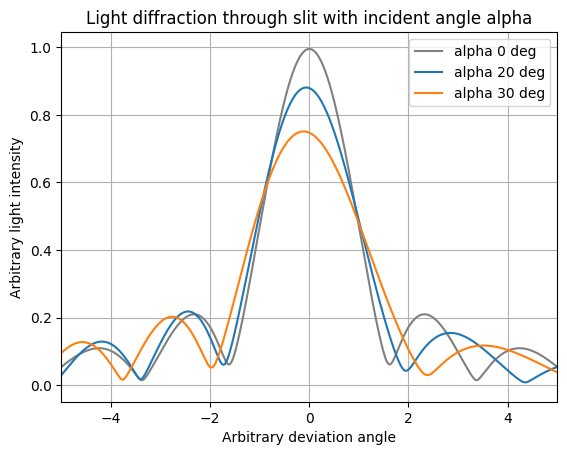

In [80]:
(x0, y0) = 0, 10 # slit center coordinate
l = 0.1 # wavelength
k = 2 * np.pi / l
d = 0.62 # slit size

def dist(x, y, x1, y1): # euclidian distance
    return np.sqrt((x - x1)**2 + (y - y1)**2)

# complex light function from source at x1,y1 at point x,y
def field(x, y, x1, y1):
    r = dist(x, y, x1, y1)
    phase = 1.j * k * r # assumed that initial phase=0
    intencity = 1 / r/r
    return np.exp(phase) * intencity

def total_field(x, y, alpha0):
    s  = 0
    z = np.linspace(-d/2, d/2, 100) # light fronline having the same phase
    for z0 in z: # rotate forntline by incident angle alpha0.
        deltax = z0 * np.cos(alpha0)
        deltay = z0 * np.sin(alpha0)
        s += field(x, y, x0 + deltax, y0 + deltay)
    return np.abs(s)


x =  np.linspace(-15, 15, 5000) # here the scenery to observe light diffraction

# start with incident angle 0
alpha0 = 0
xcenter = y0 * np.tan(alpha0)
plt.plot(x-xcenter, total_field(x-xcenter, 0, alpha0), color='gray',
         label=f'alpha {np.rad2deg(alpha0):.0f} deg')

alpha0 = np.deg2rad(20)
xcenter = y0 * np.tan(alpha0) # shift x to point where incident light falls
plt.plot(x-xcenter, total_field(x, 0, alpha0), label=f'alpha {np.rad2deg(alpha0):.0f} deg')


alpha0 = np.deg2rad(30)
xcenter = y0 * np.tan(alpha0)
plt.plot(x-xcenter, total_field(x, 0, alpha0), label=f'alpha {np.rad2deg(alpha0):.0f} deg')

plt.grid()
plt.legend()
plt.xlim(-5,5)
plt.xlabel('Arbitrary deviation angle')
plt.ylabel('Arbitrary light intensity')
plt.title('Light diffraction through slit with incident angle alpha')
plt.show()


In [50]:
xcenter


1.7632698070846498